In [1]:
%config Completer.use_jedi = False

# Load a CNN model

In [2]:
from tensorflow import keras

In [70]:
model = keras.models.load_model('./best-cnn-model.h5')
model.layers

In [8]:
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [13]:
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.029661914, 0.24136728)

# Visualize weights

In [14]:
import matplotlib.pyplot as plt

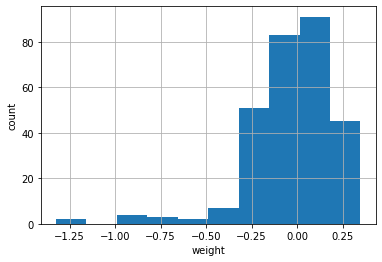

In [20]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.grid()
plt.show()

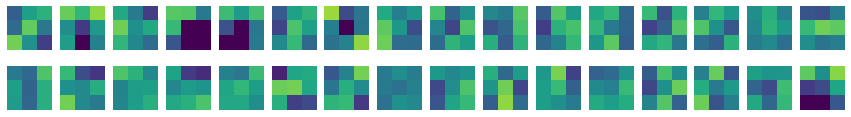

In [22]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, 16*i + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [23]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,
                                          kernel_size=3,
                                          activation='relu',
                                          padding='same',input_shape=(28, 28, 1)))

In [28]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [30]:
no_training_weights = no_training_conv.weights[0].numpy()
no_training_weights.mean(), no_training_weights.std()

(-0.001286549, 0.08370579)

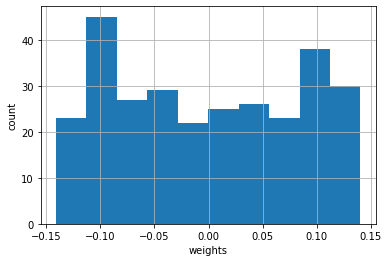

In [32]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.grid()
plt.show()

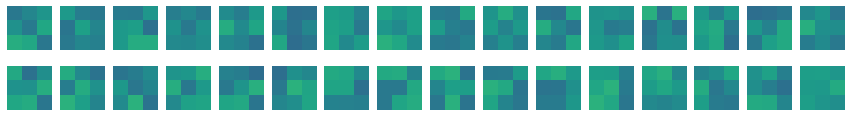

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, 16*i + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

# Visualize a feature map

In [71]:
conv_acti = keras.Model(model.input, model.layers[0].output)

In [72]:
(train_input, test_input), (train_target, test_target) = keras.datasets.fashion_mnist.load_data()

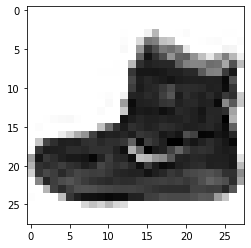

In [73]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [74]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

(1, 28, 28, 32)

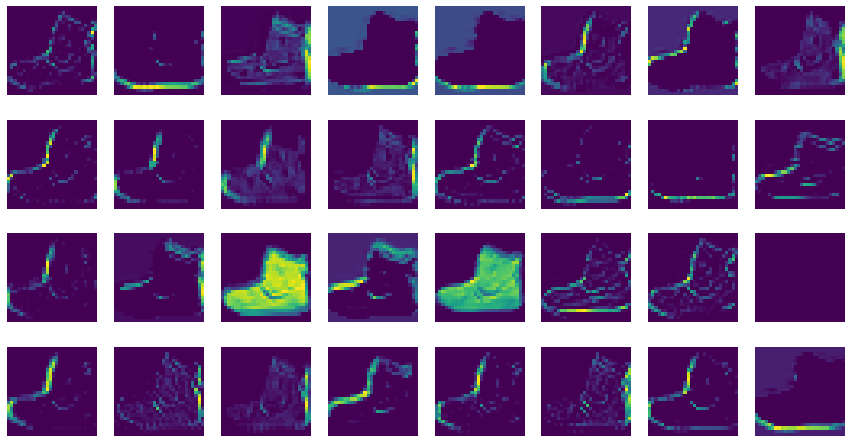

In [75]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [76]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [77]:
feature_maps = conv2_acti.predict(inputs)
feature_maps.shape

(1, 14, 14, 64)

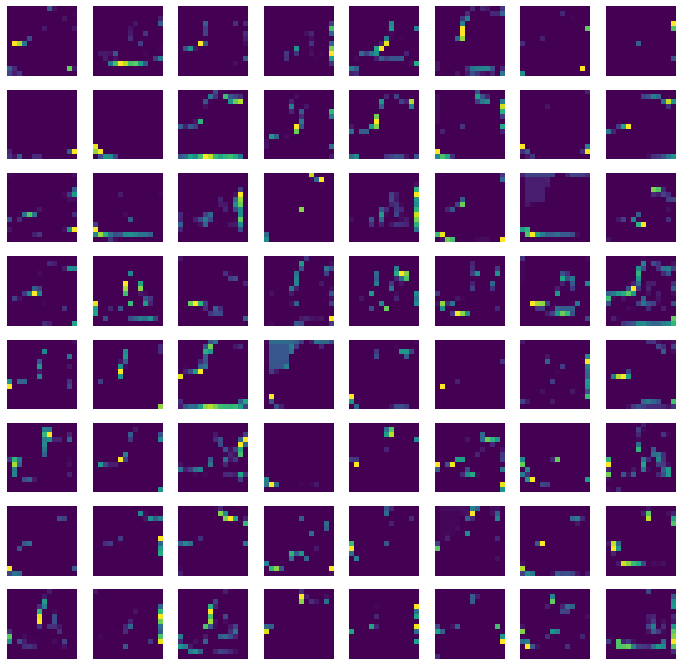

In [78]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, 8*i + j])
        axs[i, j].axis('off')
plt.show()